In [1]:
import os
import sys
sys.path.insert(0, os.path.realpath('__file__'))

import numpy as np
import matplotlib.pyplot as plt
import pyEMA

%load_ext autoreload
%autoreload 2

In [2]:
freq, H1_main = np.load("./data/acc_data.npy")

In [3]:
freq.shape, H1_main.shape

((9999,), (6, 7, 9999))

In [4]:
#Impact , accelerŽometer
FRF = H1_main[:,1,:]

freq = freq
acc = pyEMA.lscf(frf=FRF, 
                 freq=freq,
                 lower=10, 
                 upper=5000,
                 pol_order_high=60)

In [5]:
acc.get_poles(show_progress=True)

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 146.96it/s]


In [6]:
acc.stab_chart(acc.all_poles, legend = True)

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 171.83it/s]


SHIFT + LEFT mouse button to pick a pole.
RIGHT mouse button to erase the last pick.
1. Frequency: ~202 -->	176.0700294028461 Hz	(xi = 0.0088)
2. Frequency: ~484 -->	476.51419337030217 Hz	(xi = 0.0019)
3. Frequency: ~936 -->	932.2526905469042 Hz	(xi = 0.0015)
4. Frequency: ~1553 -->	1534.769081391052 Hz	(xi = 0.0020)
5. Frequency: ~2299 -->	2286.341405130745 Hz	(xi = 0.0028)
6. Frequency: ~3176 -->	3162.504244694011 Hz	(xi = 0.0017)
7. Frequency: ~4177 -->	4181.0190956623255 Hz	(xi = 0.0015)


<Figure size 432x288 with 0 Axes>

In [7]:
# Alternatively the frequencies can be defines as a list, e.g.:
n_freq =  [176,476,932,1534,2258,3161,4180]
acc.select_closest_poles(n_freq)

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 116.28it/s]


In [8]:
# Reconstruction of FRF
frf_rec, modal_const = acc.lsfd(whose_poles='own', FRF_ind='all')

The selected natural frequencies and corresponding damping factors:

In [9]:
acc.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  176.1	0.0087
2)  476.5	0.0017
3)  932.3	0.0015
4) 1534.8	0.0020
5) 2286.3	0.0028
6) 3162.2	0.0023
7) 4181.7	0.0016


Modal constants and residuals (last but one is the lower residual, last one is the upper residual):

In [10]:
acc.A[:,:3]

array([[  -7.73492649  -46.51292545j, -129.63095944 -360.90262371j,
         -28.03362383 -175.83907874j],
       [  -5.7213313    +5.33464569j,  251.52112325 +615.41275008j,
         228.26175558+1840.76796789j],
       [   5.55008343  +33.23804336j,  218.40224604 +388.38120494j,
        -345.79243102-1259.88031961j],
       [   8.71718915  +30.68090147j, -222.41140451 -376.1425513j ,
        -373.86070041-1281.00444619j],
       [  -1.50505047   +5.39759831j, -333.35970778 -543.8901591j ,
         529.76165974+1702.19320602j],
       [ -11.84460417  -34.74745499j,  169.85588859 +285.62213155j,
         -90.0463955  -230.26401024j]])

Real part of modal constants:

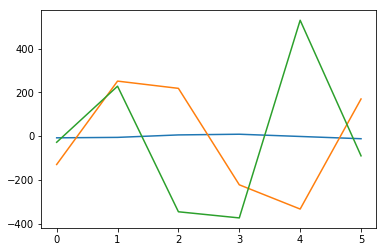

In [11]:
plt.plot(np.real(acc.A[:,:3]))

Showing the reconstructed FRF

In [12]:
FRF.shape

(6, 9999)

In [13]:
freq.shape

(9999,)

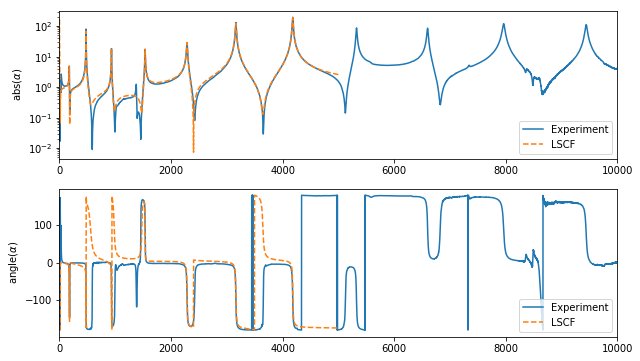

In [14]:
freq_a = acc.freq
select_loc = 0

plt.figure(figsize = ((10,6)))
plt.subplot(211)

plt.semilogy(freq, np.abs(FRF[select_loc]), label='Experiment')
plt.semilogy(freq_a, np.abs(frf_rec[select_loc]),'--', label='LSCF')
plt.xlim(0,freq[-1])
plt.ylabel(r"abs($\alpha$)")

plt.legend(loc = 'best')

plt.subplot(212)
plt.plot(freq, np.angle(FRF[select_loc],deg = 1), label='Experiment')
plt.plot(freq_a, np.angle(frf_rec[select_loc],deg = 1),'--',label='LSCF')
plt.xlim(0,freq[-1])

plt.ylabel(r"angle($\alpha$)")
plt.legend(loc = 'best')